In [1]:
import time
import serial
import serial.tools.list_ports
from gdx import gdx

In [2]:
gdx = gdx.gdx()

In [4]:
gdx.open(connection='usb')

In [5]:
def getDeviceInfo():
    for myinfo in gdx.device_info():
        print(myinfo)

In [6]:
getDeviceInfo()

GDX-3MG 013012E9
Go Direct® 3-Axis Magnetic Field Sensor
70
Charging



In [7]:
def getSensorInfo():
    for myinfo in gdx.sensor_info():
        print(myinfo)

In [8]:
getSensorInfo();

[1, 'X magnetic field', 'mT', []]
[2, 'Y magnetic field', 'mT', []]
[3, 'Z magnetic field', 'mT', []]
[4, 'X magnetic field 130mT', 'mT', []]
[5, 'Y magnetic field 130mT', 'mT', []]
[6, 'Z magnetic field 130mT', 'mT', []]


In [9]:
gdx.select_sensors([1,2,3])

In [10]:
column_headers = gdx.enabled_sensor_info() 

In [11]:
def getUnits(info_headers):
    unit_list = []
    units = ''
    for headers in info_headers:
        units = str(headers[headers.find('(') : headers.find(')') +1])
        unit_list.append(units)
    return unit_list

In [48]:
def getMeasurement(samples,channels):
    deltaT=100
    gdx.start(deltaT)
    data=[0]*len(channels)
    n=0
    for i in range(0,samples*2):
            new_data=gdx.read()
            if i>samples:
                n+=1
                #print(str(i)+" "+str(new_data))
                data = [sum(z) for z in zip(new_data, data)]
    
    out=gdx.stop()
    
    data=[m/n for m in data]
    return data

In [13]:
column_headers = gdx.enabled_sensor_info() 
readings=getMeasurement(10,column_headers)
print(readings)

11 [0.011946000158786774, 0.0005445003625936806, -0.05346449464559555]
12 [0.012095999903976917, 0.0012944996124133468, -0.05361449718475342]
13 [0.011495999991893768, 0.0017444997793063521, -0.05346449464559555]
14 [0.01134599931538105, 0.0012944996124133468, -0.053764499723911285]
15 [0.011946000158786774, 0.0009944997727870941, -0.053764499723911285]
16 [0.011045999825000763, 0.0008445002022199333, -0.05316450074315071]
17 [0.01089600007981062, 0.0017444997793063521, -0.05361449718475342]
18 [0.01224599964916706, 0.0012944996124133468, -0.05346449464559555]
19 [0.011645999737083912, 0.0015945002669468522, -0.05331449955701828]
[0.011629333202209737, 0.0012611665556000338, -0.05351449756158723]


In [14]:
com_ports=serial.tools.list_ports.comports()
for p in com_ports:
    print(p.device)

/dev/ttyS0
/dev/ttyS1
/dev/ttyS2
/dev/ttyS3
/dev/ttyS4
/dev/ttyS5
/dev/ttyS6
/dev/ttyS7
/dev/ttyS8
/dev/ttyS9
/dev/ttyS10
/dev/ttyS11
/dev/ttyS12
/dev/ttyS13
/dev/ttyS14
/dev/ttyS15
/dev/ttyS16
/dev/ttyS17
/dev/ttyS18
/dev/ttyS19
/dev/ttyS20
/dev/ttyS21
/dev/ttyS22
/dev/ttyS23
/dev/ttyS24
/dev/ttyS25
/dev/ttyS26
/dev/ttyS27
/dev/ttyS28
/dev/ttyS29
/dev/ttyS30
/dev/ttyS31
/dev/ttyUSB0


In [15]:
arduino = serial.Serial('/dev/ttyUSB0', baudrate=9600, timeout=1)

In [18]:
def handshake_arduino(arduino, sleep_time=1):
    time.sleep(sleep_time);
    timeout = arduino.timeout
    arduino.timeout = 2
    arduino.write('h'.encode())
    while (arduino.in_waiting < 0):
        pass
    response= arduino.read_until()
    print(response.decode().strip())
    arduino.timeout = timeout




handshake_arduino(arduino)

R


In [19]:
positions = []
field= []
def daq_get_values(start_position=0.0,end_position=0.5,step=0.1):

    
    position=0.0
    
    # send movement command
    
    
    while position <= end_position:
        positions.append(position)
        field.append(getMeasurement(10,column_headers))  
        movement_command="q"+str(step)
        arduino.write(movement_command.encode())
        position+=step
    

In [49]:
daq_get_values(0.0,0.6,0.1)

In [50]:
print(field)

[[0.011579333080185784, 0.001177833402632839, -0.053481163250075445], [0.011512666423287656, 0.0010445000500314766, -0.05363116537531217], [0.0117293330323365, 0.0014111666241660714, -0.053564498821894325], [-0.0015540003466109435, 0.028444499812192388, -0.050547832830084696], [-0.06440400332212448, 0.03032783232629299, -0.01273116593559583], [-0.0714540026254124, 0.023211166883508366, -0.01886449878414472], [-0.0676706689927313, 0.027761166501376364, -0.015681165373987623], [-0.040004000481632024, 0.040077833665741816, 0.0010521676716355917], [-0.0338373347508928, 0.001061166636645794, -0.04546449954311053], [-0.04285400130579041, -0.02338883363538318, -0.04491450016697248]]


In [22]:
import matplotlib.pyplot as plt 

%matplotlib widget
plt.rcParams['animation.html']='jshtml'

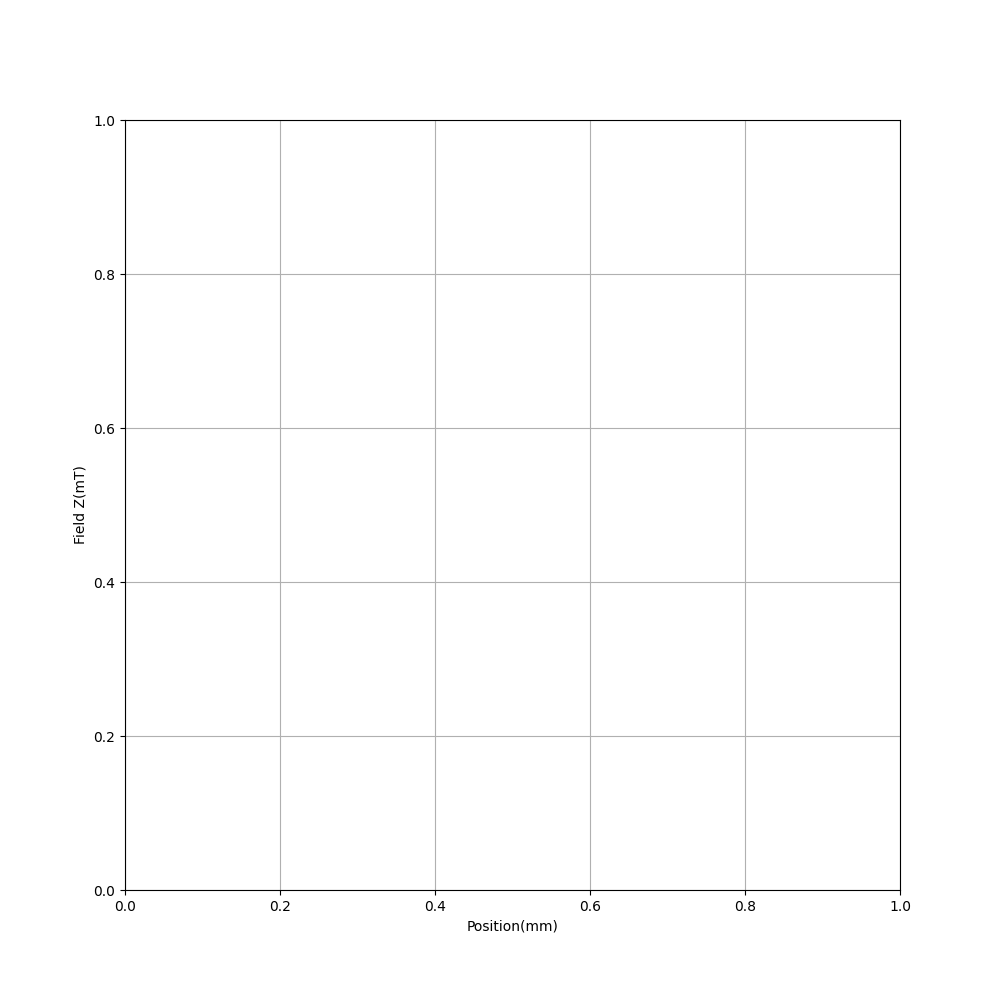

In [23]:
def new_figure():
    fig=plt.figure(figsize=[10,10])
    plt.grid()
    plt.xlabel('Position(mm)')
    plt.ylabel('Field Z(mT)')
    #plt.rcParams['figure.dpi'] = 150
    return fig
fig=new_figure()

In [51]:
plt.plot(positions,[row[0] for row in field],'-o',color='gray',markerfacecolor='red')